In [1]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

In [2]:
import pandas as pd

# Importing the dataset into a DataFrame
df = pd.read_csv(URL)

# Displaying the first few rows of the DataFrame
df.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


In [5]:
# Identify numerical columns in the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values with the mean in the numerical columns only
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Now let's check if there are still any missing values
missing_values_after = df.isnull().sum()

# Display the number of missing values after filling
missing_values_after


model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64

In [6]:
# Dropping duplicate entries from the DataFrame
df_cleaned = df.drop_duplicates()

# Displaying the number of duplicate entries that were dropped
duplicate_entries_dropped = df.shape[0] - df_cleaned.shape[0]
duplicate_entries_dropped

154

Top 5 attributes correlated with price:
price         1.000000
year          0.635715
mileage       0.530483
engineSize    0.411451
tax           0.405970
Name: price, dtype: float64

Number of cars under each fuel type:
fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


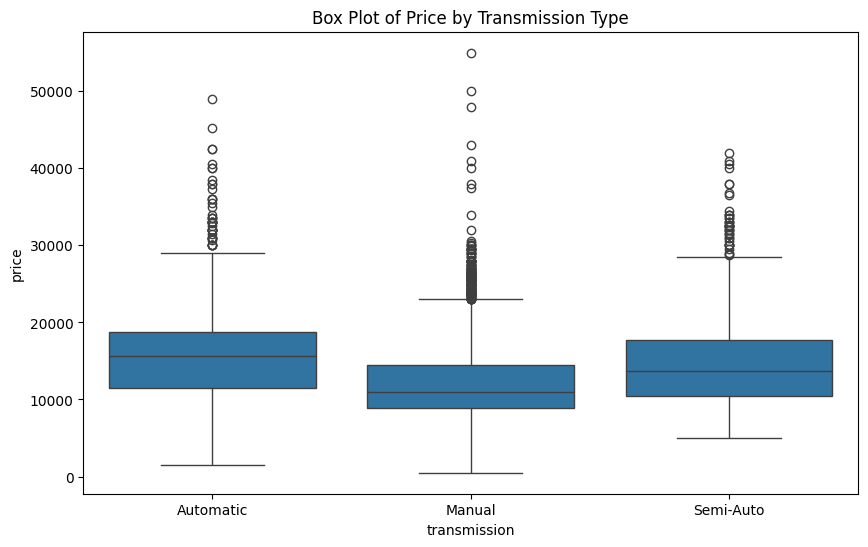

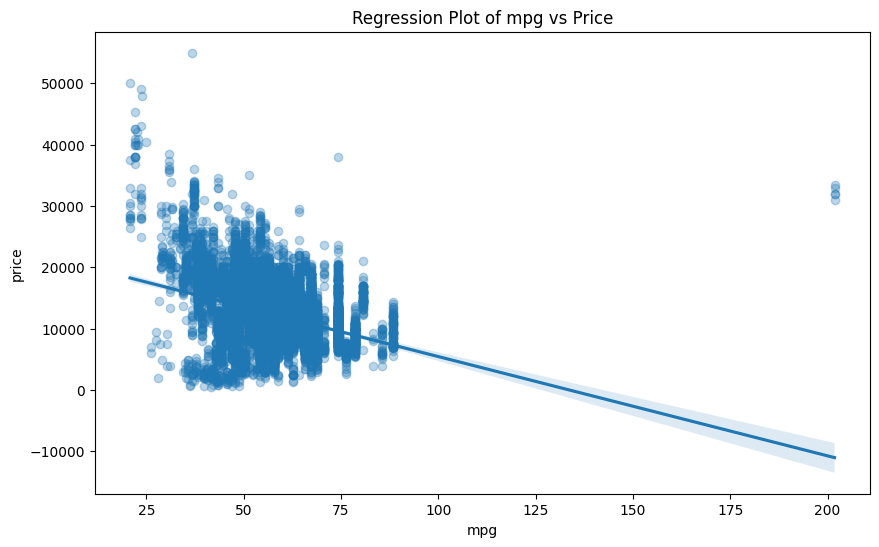

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_cleaned is your cleaned DataFrame from earlier steps

# Select only numeric columns
numeric_df = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for the numeric DataFrame
correlation_matrix = numeric_df.corr()

# Extract the correlations with the 'price' column
price_correlation = correlation_matrix["price"].abs()

# Identify the 5 attributes with the highest correlation to price
top_5_correlated_attributes = price_correlation.sort_values(ascending=False).head(5)
print("Top 5 attributes correlated with price:")
print(top_5_correlated_attributes)

# Count the number of cars under each unique value of fuelType attribute
fuel_type_counts = df_cleaned['fuelType'].value_counts()
print("\nNumber of cars under each fuel type:")
print(fuel_type_counts)

# Create a box plot for price by transmission type
plt.figure(figsize=(10, 6))
sns.boxplot(x="transmission", y="price", data=df_cleaned)
plt.title("Box Plot of Price by Transmission Type")
plt.show()

# Create a regression plot between mpg and price
plt.figure(figsize=(10, 6))
sns.regplot(x="mpg", y="price", data=df_cleaned, scatter_kws={'alpha':0.3})
plt.title("Regression Plot of mpg vs Price")
plt.show()



# Fit a Linear Regression Model to Predict price Using mpg

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Fit a linear regression model using 'mpg' as the predictor
X = df_cleaned[['mpg']]
y = df_cleaned['price']

model = LinearRegression()
model.fit(X, y)

# Predict and calculate R^2 and MSE
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"R^2: {r2}, MSE: {mse}")


R^2: 0.11989802249624182, MSE: 19741690.80944619


# Fit a Linear Regression Model to Predict price Using Multiple Features

In [10]:
# Fit a linear regression model using multiple features
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
X = df_cleaned[features]
y = df_cleaned['price']

model = LinearRegression()
model.fit(X, y)

# Predict and calculate R^2 and MSE
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"R^2: {r2}, MSE: {mse}")


R^2: 0.7265379654546995, MSE: 6134065.224381753


# Create a Pipeline Model with StandardScaler, Polynomial Features, and Linear Regression

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Create a pipeline with scaling, polynomial features, and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

pipeline.fit(X, y)

# Predict and calculate R^2 and MSE
y_pred = pipeline.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"R^2: {r2}, MSE: {mse}")


R^2: 0.7666619695239302, MSE: 5234038.06546274


# Split Data into Training and Testing, Fit Ridge Regression

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Fit Ridge regression with alpha=0.1
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

# Calculate R^2 on test data
y_test_pred = ridge.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

print(f"R^2 on Test Data: {r2_test}")


R^2 on Test Data: 0.7263234750909549


# Perform Second Order Polynomial Transform and Fit Ridge Regression

In [13]:
# Create polynomial features (degree 2) for both training and test data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit Ridge regression with alpha=0.1
ridge_poly = Ridge(alpha=0.1)
ridge_poly.fit(X_train_poly, y_train)

# Calculate R^2 and MSE on the modified test data
y_test_poly_pred = ridge_poly.predict(X_test_poly)
r2_poly = r2_score(y_test, y_test_poly_pred)
mse_poly = mean_squared_error(y_test, y_test_poly_pred)

print(f"R^2 with Polynomial Features: {r2_poly}, MSE with Polynomial Features: {mse_poly}")


R^2 with Polynomial Features: 0.7672294887982128, MSE with Polynomial Features: 5051322.257409821


/media/OS/D/Online_Course/IBM_Data_Science_Professional_Certificate/IBM_DS_Course_Repo/IBM-DS-Course-Repo/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.23768e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


# Perform Grid Search on Ridge Regression for Optimal Alpha

In [14]:
from sklearn.model_selection import GridSearchCV

# Define the alpha values to search
alphas = [0.01, 0.1, 1, 10, 100]

# Create the Ridge regression model
ridge = Ridge()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=ridge, param_grid={'alpha': alphas}, cv=4, scoring='r2')
grid_search.fit(X_train, y_train)

# Find the best alpha
best_alpha = grid_search.best_params_['alpha']
best_r2 = grid_search.best_score_

print(f"Best Alpha: {best_alpha}, Best R^2: {best_r2}")


Best Alpha: 1, Best R^2: 0.7238420117641572
